In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Load the dataset
file_path = ('C:/Users/pamwa/team_project/data/raw/Coffee_Shop_Sales.csv')
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
sales_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023/1/1,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,$6.00,1,Jan,7,Sun,7
1,2,2023/1/1,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,$6.20,1,Jan,7,Sun,7
2,3,2023/1/1,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,$9.00,1,Jan,7,Sun,7
3,4,2023/1/1,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,$2.00,1,Jan,7,Sun,7
4,5,2023/1/1,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,$6.20,1,Jan,7,Sun,7


In [27]:
# Convert Revenue from string to float by removing the dollar sign
sales_data['Revenue'] = sales_data['Revenue'].replace('[\$,]', '', regex=True).astype(float)


In [28]:
# Group by the month and sum the revenue
monthly_revenue = sales_data.groupby('Month')['Revenue'].sum()

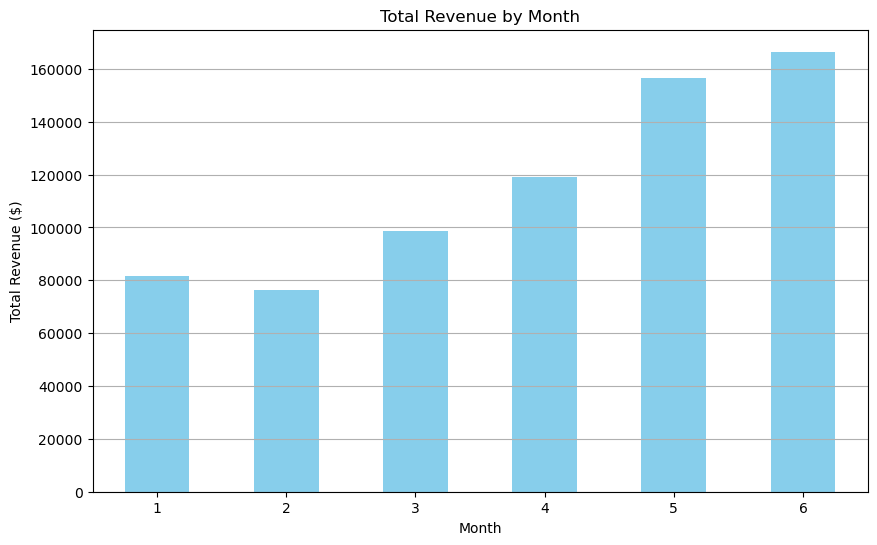

In [29]:
# Create a bar plot for Month by Revenue
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

In [30]:
# Aggregate the revenue by Month and Product
product_month_revenue = sales_data.pivot_table(index='product_category', columns='Month.1', values='Revenue', aggfunc='sum')

# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Reorder the columns of the DataFrame according to month_order
product_month_revenue = product_month_revenue[month_order]

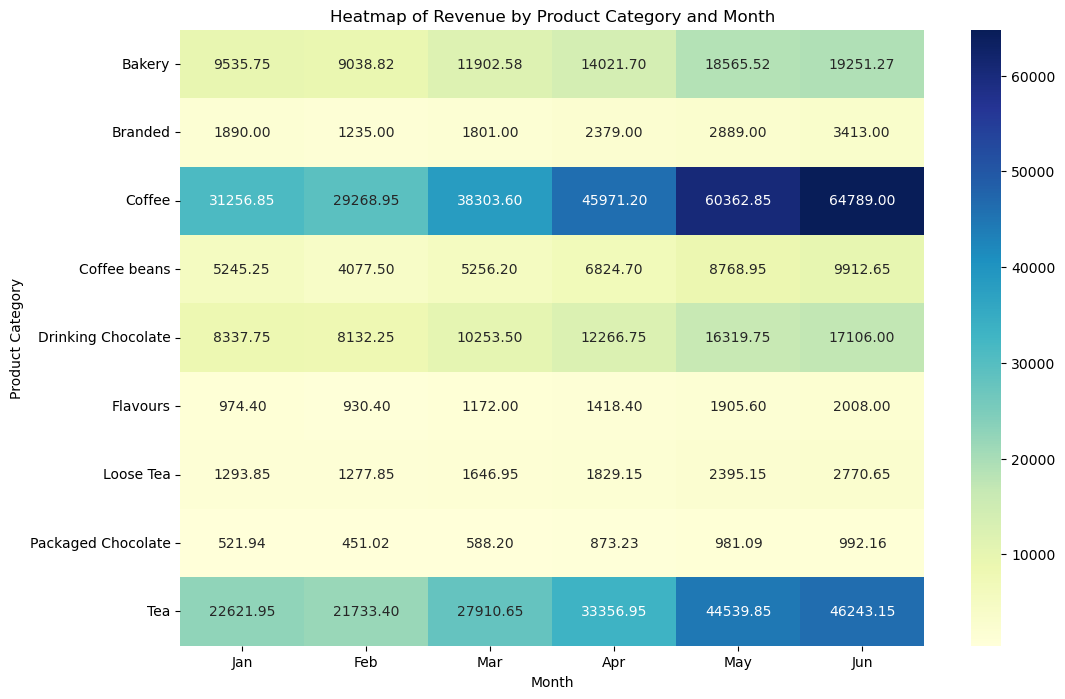

In [31]:

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(product_month_revenue, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Revenue by Product Category and Month')
plt.xlabel('Month')
plt.ylabel('Product Category')

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

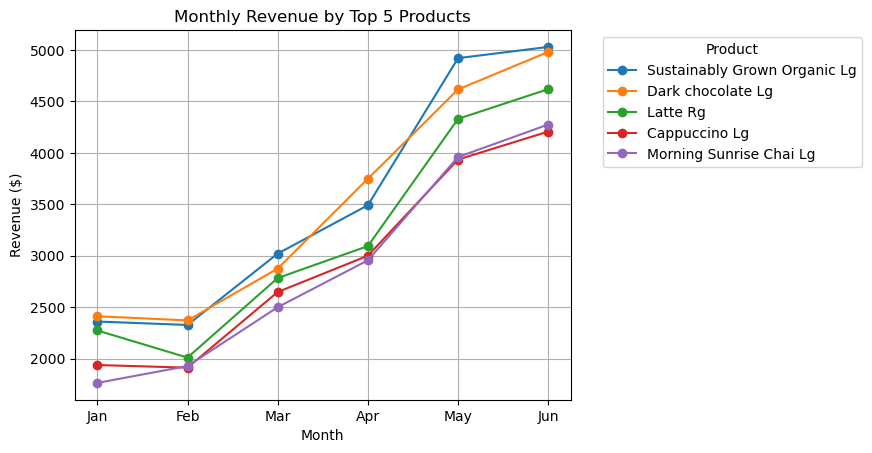

In [32]:
# Aggregate the revenue by Month and Product
product_month_revenue = sales_data.pivot_table(index='Month.1', columns='product_detail', values='Revenue', aggfunc='sum')

# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
product_month_revenue = product_month_revenue.reindex(month_order)

# Select the top 5 products by total revenue or specify products of interest
top_products = product_month_revenue.sum().nlargest(5).index
top_products_revenue = product_month_revenue[top_products]

# Plot the line chart
plt.figure(figsize=(14, 8))
top_products_revenue.plot(kind='line', marker='o')

plt.title('Monthly Revenue by Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(6), labels=month_order)
plt.grid(True)

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

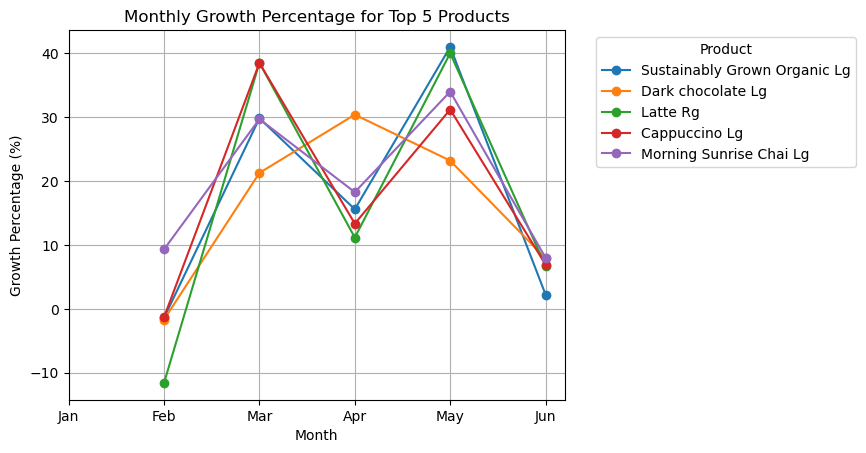

In [33]:
# Aggregate the revenue by Month and Product
product_month_revenue = sales_data.pivot_table(index='Month.1', columns='product_detail', values='Revenue', aggfunc='sum')

# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
product_month_revenue = product_month_revenue.reindex(month_order)

# Select the top 5 products by total revenue
top_products = product_month_revenue.sum().nlargest(5).index
top_products_revenue = product_month_revenue[top_products]

# Calculate the growth percentage
growth_percentage = top_products_revenue.pct_change() * 100

# Plot the growth percentage line chart
plt.figure(figsize=(14, 8))
growth_percentage.plot(kind='line', marker='o')

plt.title('Monthly Growth Percentage for Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Growth Percentage (%)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(6), labels=month_order)
plt.grid(True)

# Show the plot
plt.show()